In [2]:
%matplotlib inline
import numpy as np
import cv2
import glob
import random
np.random.seed(12345)
# Using opencv calibration toolbox
#Seed for generating same results

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#Stopping criterian

In [3]:
images = glob.glob('Fullset/*')
MPE = []
SD = []
#Files and Global Paramters

In [4]:
for i in xrange(5,55,5):
    objp = np.zeros((6*8,3), np.float32)
    objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)
    objpoints = []
    imgpoints = []
    image = np.random.choice(images, i)
    for fname in image:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,(480,360))
        img = cv2.resize(img,(480,360))
        ret, corners = cv2.findChessboardCorners(gray, (6,8), None)
        if ret == True:
            print "T"
            corners2=cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
            objpoints.append(objp)
            imgpoints.append(corners)
            
    cv2.destroyAllWindows()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    mean_error = 0
    e = []
    for j in xrange(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[j], rvecs[j], tvecs[j], mtx, dist)
        error = cv2.norm(imgpoints[j], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
        e.append(error)
        mean_error += error
    print str(i) + " Total Mean Projection Error: " + str(mean_error/len(objpoints)) + " SD = "+str(np.std(e))
    MPE.append(mean_error/len(objpoints))
    SD.append(np.std(e))
    

T
T
T
T
T
5 Total Mean Projection Error: 0.339379232932 SD = 0.134671747901
T
T
T
T
T
T
T
T
T
T
10 Total Mean Projection Error: 0.503810935245 SD = 0.211508483755
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
15 Total Mean Projection Error: 0.39152138348 SD = 0.172439427445
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
20 Total Mean Projection Error: 0.432387070117 SD = 0.210177937987
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
25 Total Mean Projection Error: 0.439964675291 SD = 0.201614701636
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
30 Total Mean Projection Error: 0.377774684444 SD = 0.151682071852
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
35 Total Mean Projection Error: 0.391750460813 SD = 0.201060601303
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
40 Total Mean Projection Error: 0.445286838182 SD = 0.18381320724
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
45 Total Mean Pro

In [5]:
import matplotlib.pyplot as plt

In [6]:
x = np.arange(5, 55, 5)
x

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [7]:
y = MPE
y

[0.33937923293213534,
 0.503810935244613,
 0.391521383480204,
 0.432387070117284,
 0.43996467529130756,
 0.37777468444415996,
 0.39175046081349857,
 0.44528683818194026,
 0.46728892087004387,
 0.4016748490463746]

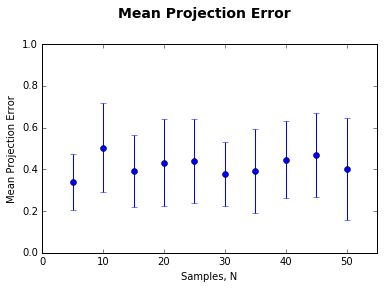

In [8]:
fig = plt.figure()
fig.suptitle('Mean Projection Error', fontsize=14, fontweight='bold')
plt.errorbar(x, y, yerr=SD,fmt='o')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Samples, N')
ax.set_ylabel('Mean Projection Error')
ax.axis([0, 55, 0, 1])

plt.show()